In [1]:
import torchaudio
import torch
import pandas as pd
from speechbrain.pretrained import EncoderClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

torchvision is not available - cannot save figures


In [2]:
classes = ['england', 'us', 'canada', 'australia', 'indian', 'scotland', 'ireland', 'african', 'malaysia', 'newzealand', 'southatlandtic', 'bermuda', 'philippines', 'hongkong', 'wales', 'singapore']

In [3]:
test_path = '/home/dan/Downloads/accent_data/'
source_path = '/home/dan/Downloads/embedding_model.ckpt'
hparams_path = '/home/dan/Downloads/hyperparams.yaml'

In [4]:
classifier = EncoderClassifier.from_hparams(source=source_path, hparams_file=hparams_path)

data/rir_folder/rirs_noises.zip exists. Skipping download


In [5]:
test_items = pd.read_csv(f'{test_path}/test.csv')

In [6]:
y_true = []
y_pred = []

In [7]:
for index, row in test_items.iterrows():
    filepath = f"{test_path}/test/{row['utt_id']}.wav"
    y_true.append(row['accent'])
    out_prob, score, index, text_lab = classifier.classify_file(filepath)
    y_pred.append(text_lab)

In [8]:
cm = confusion_matrix(y_true, y_pred, labels=classes)

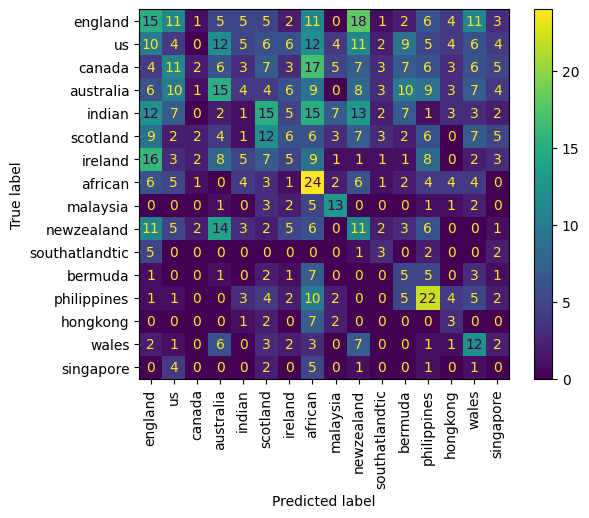

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
disp.ax_.tick_params(axis='x', labelrotation = 90)

In [10]:
print(classification_report(y_true, y_pred))

NameError: name 'classification_report' is not defined